In [32]:
import cv2

import matplotlib.pyplot as plt

import numpy as np

import os

from PIL import Image

from skimage.feature import match_descriptors
from skimage.measure import ransac
from skimage.transform import ProjectiveTransform
from extract_features_class import ExtractFeatures

## Extract features from images

In [33]:
ef = ExtractFeatures()
ef.create_model()
img_feats = ef.process("image_list.txt")

Args <extract_features_class.ExtractFeatures.init_params.<locals>.Args object at 0x7fd922dda370>


100%|██████████| 2/2 [00:02<00:00,  1.02s/it]


### Change the pair index here (possible values: 1, 2 or 3)

In [34]:
pair_idx = 4
assert(pair_idx in [1, 2, 3, 4])

### Loading the features

In [35]:
pair_path = os.path.join(os.getcwd() + '/qualitative/images', 'pair_%d' % pair_idx)

In [36]:
image1 = np.array(Image.open(os.path.join(pair_path, '1.jpg')))
image2 = np.array(Image.open(os.path.join(pair_path, '2.jpg')))

In [37]:
feat1, feat2 = img_feats

### Mutual nearest neighbors matching

In [38]:
matches = match_descriptors(feat1['descriptors'], feat2['descriptors'], cross_check=True)

In [39]:
print('Number of raw matches: %d.' % matches.shape[0])

Number of raw matches: 2133.


### Homography fitting

In [40]:
keypoints_left = feat1['keypoints'][matches[:, 0], : 2]
keypoints_right = feat2['keypoints'][matches[:, 1], : 2]
np.random.seed(0)
model, inliers = ransac(
    (keypoints_left, keypoints_right),
    ProjectiveTransform, min_samples=4,
    residual_threshold=4, max_trials=10000
)
n_inliers = np.sum(inliers)
print('Number of inliers: %d.' % n_inliers)

Number of inliers: 826.


### Plotting

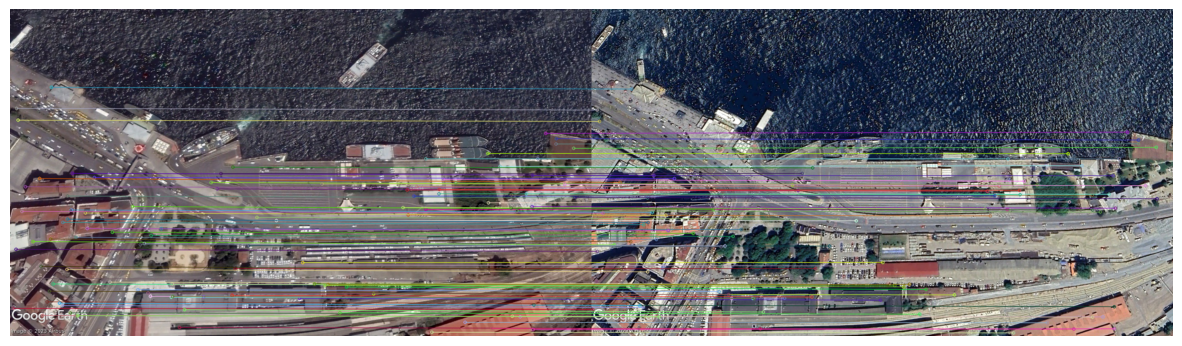

In [44]:
draw_th = 100
inlier_keypoints_left = [cv2.KeyPoint(point[0], point[1], 1) for point in keypoints_left[inliers][:draw_th]]
inlier_keypoints_right = [cv2.KeyPoint(point[0], point[1], 1) for point in keypoints_right[inliers][:draw_th]]
placeholder_matches = [cv2.DMatch(idx, idx, 1) for idx in range(n_inliers)[:draw_th]]
image3 = cv2.drawMatches(image1, inlier_keypoints_left, image2, inlier_keypoints_right, placeholder_matches, None)

plt.figure(figsize=(15, 15))
plt.imshow(image3)
plt.axis('off')
plt.show()